In [280]:
#import libraries to use for my analysis and visualizations. Then read the file.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
 
np.random.seed(0)

%matplotlib inline
df=pd.read_csv('Churn_Clean209.csv')


In [281]:
#Remove columns that are not relevent to the question being addressed in this analysis or are redundant
df=df.drop(columns=['CaseOrder','Customer_id','Interaction','UID', 'Lat','Lng','State','TimeZone','Zip','City','County','Job','Children'])

In [282]:
df = pd.get_dummies(df, columns = ['Area', 'Marital', 'Gender', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod'])

In [283]:
#rename vague column names
df.rename(columns={'Item1' :'Responses_Timely',
'Item2' : 'Fixes_Timely',
'Item3':'Replacements_Timely',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Respecful_response',
'Item7':'Courteous_exchange',
'Item8':'Active_Listening_Evidence'},inplace=True)

In [284]:
#Split data set target from remaining features
y = df['Churn']
x = df.drop('Churn', axis=1) 
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
#view the sizes of the files
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 

(8000, 63) (2000, 63) (8000,) (2000,)


In [ ]:
df2 = pd.DataFrame(y_train)
df2.to_csv('y_train2.csv',index=False)
df3 = pd.DataFrame(x_train)
df3.to_csv('x_train2.csv',index=False)
df4 = pd.DataFrame(y_test)
df4.to_csv('y_test2.csv',index=False)
df5 = pd.DataFrame(x_test)
df5.to_csv('x_test2.csv',index=False)

In [285]:
#Source (Random Forests Classifiers in Python)
#Create a Classifier and fit the model
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [286]:
#Source (Random Forests Classifiers in Python)
#Predictions
y_pred=rf.predict(x_test)

In [287]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
#create a classification report which shows the metrics that can be used to show how well the model performed
#Accuracy score to show how often the classifier was correct
#Precision is high which shows the model didn't label the no churns as yes churns. 
#Recall is lower showing that the model is missed labeling some yes churns so it is being too careful. 
#The F1 score is low which shows that the precision and recall are not balanced
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

          No       0.91      0.94      0.92      1442
         Yes       0.84      0.75      0.79       558

    accuracy                           0.89      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.89      0.89      0.89      2000



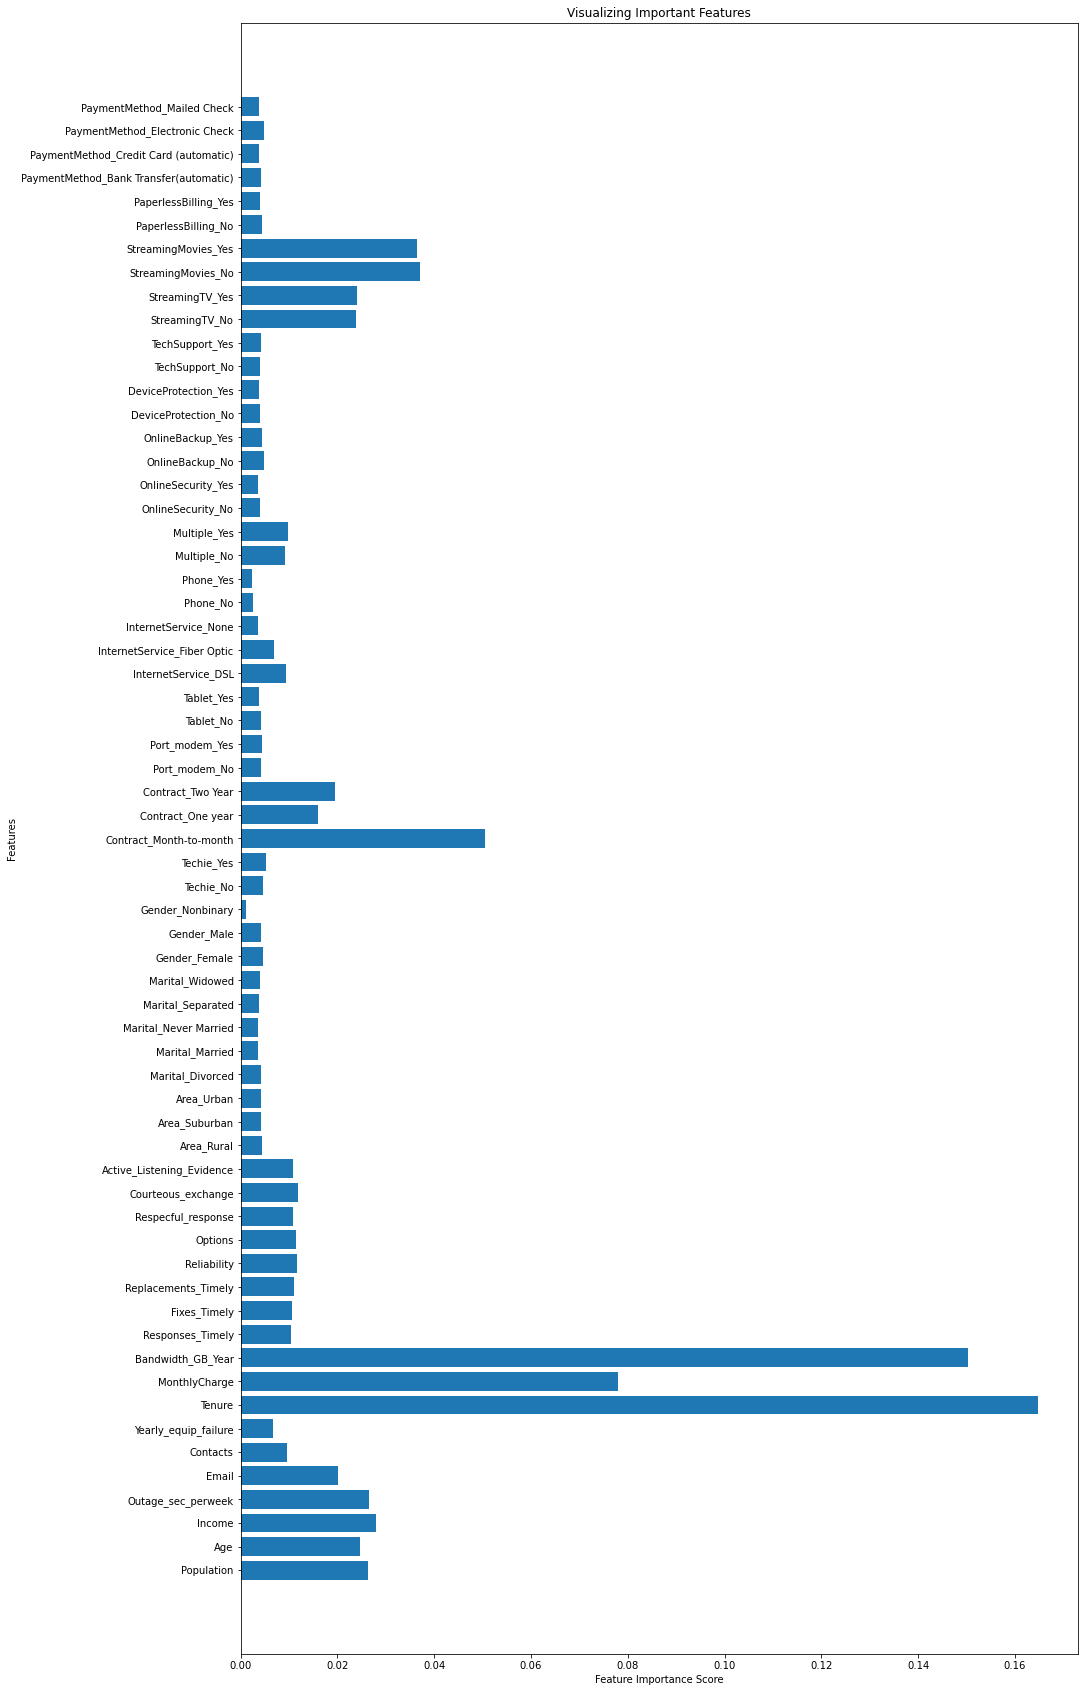

In [288]:
#Plot feature importance scores 
plt.figure(figsize=(15, 30))
plt.barh([x for x in range(len(imp))], imp)
 
class_names = ['Population', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Responses_Timely', 'Fixes_Timely',
       'Replacements_Timely', 'Reliability', 'Options', 'Respecful_response',
       'Courteous_exchange', 'Active_Listening_Evidence', 'Area_Rural',
       'Area_Suburban', 'Area_Urban', 'Marital_Divorced', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Techie_No',
       'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No',
       'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank Transfer(automatic)',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']
tick_marks = np.arange(len(class_names))
plt.yticks(tick_marks, class_names, rotation=0)
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xlabel('Feature Importance Score')
plt.show()